# Анализ результатов экзаменов по математике
### Описание датасета

Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике


**Рекомендации по выполнению проекта**

1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
5. Проведите корреляционный анализ количественных переменных
6. Отберите не коррелирующие переменные.
7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.


In [1]:
import numpy as np
from scipy.stats import ttest_ind
from itertools import combinations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

data = pd.read_csv('stud_math.csv')

In [2]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В таблице 30 колонок, из них одна имеет неудобную форму для использования и подлежит переименовыванию.

In [4]:
data.rename(
    columns={'studytime, granular': 'granular_studytime'}, inplace=True)

Все столбцы кроме трех первых содержат пропуски значений.

Колонки с категориальными признаками: school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic

Колонки с числовыми признаками: age, Medu, Fedu, traveltime, studytime, failures, granular_studytime, famrel, freetime, goout, health, absences

Колонка с результатом score

### Вспомогательные функции

In [5]:
# Функция описывает чиловой столбец
def describe_numcol(col):
    #    s = col.shape[0]
    d = col.describe()
    print(d)
    n = col.isna().sum()
#    print('В колонке', s - int(d['count']), 'пропущенных значений')
    print('В колонке', n, 'пропущенных значений')
    sns.histplot(col)
    return d

In [6]:
# Функция формирует описание столбцов числовых признаков
def numerical_review(data, num_list):
    ds = data.shape[0]                 # общее количество строк
    num_dict = {}
    for num_col in num_list:
        d = data[num_col].describe()   # описание колонки
#        NaN_qty = ds - int(d['count'])
        NaN_qty = data[num_col].isna().sum()
        Max = d['max']
        Min = d['min']
        Q1 = d['25%']
        Q2 = d['50%']
        Q3 = d['75%']
        LoAllert = '!' if Min < 2.5*Q1 - 1.5*Q3 else ''
        HiAllert = '!' if Max > 2.5*Q3 - 1.5*Q1 else ''
        num_dict[num_col] = [NaN_qty, NaN_qty / ds * 100,
                             LoAllert, HiAllert, Min, Q1, Q2, Q3, Max]
    return num_dict

In [7]:
# Функция заполняет пропуски значений цифровых признаков медианой
def fill_all_nans(data, num_list):
    ds = data.shape[0]
    for num_col in num_list:
        d = data[num_col].describe()
        if data[num_col].isna().sum() > 0:
            data[num_col].fillna(d['50%'], inplace=True)
#        if ds - int(d['count']) > 0:
#            data.loc[np.isnan(data[num_col]), num_col] = d['50%']
    return

In [8]:
# Функция формирует описание всех столбцов строковых (категориальных) признаков в виде словаря
def cat_review(data, str_list):
    ds = data.shape[0]                 # общее количество строк
    str_dict = {}
    for col in str_list:
        vals = data[col].value_counts()
#        NaNs = data_size - vals.sum()
        NaNs = data[col].isna().sum()
        Freq = vals.index[0]
        All = ', '.join(list(vals.index))
        str_dict[col] = [NaNs, NaNs/ds*100, Freq, All]
    return str_dict

In [9]:
# Функция формирует описание одного столбца категориальных признаков
# Унаследована от одной из первых версий обработки
def describe_char_col(col):
    print(col.unique())
    print('В столбце', col.shape[0]-col.value_counts().sum(), 'пропусков')
    val = col.value_counts()
    print(val.head())
    print('самое частое значение', val.index[0])
    return val.index[0]

In [10]:
# Функция заполняет все пропуски категориальных признаков модой (самым частым значением)
def fill_all_cat_nans(data, char_list):
    ds = data.shape[0]
    for col in char_list:
        vals = data[col].value_counts()
        if data[col].isna().sum() > 0:
            #        if ds - vals.sum() >0:
            data[col].fillna(vals.index[0], inplace=True)
    return

In [11]:
# Проверка наличия статистической разницы в распределении оценок по категориальным признакам
# с помощью теста Стьюдента. Нулевая гипотеза в том, что распределения оценок батончиков
# по различным параметрам неразличимы с учетом поправки Банферони.
# Результат: 1 - если найдены стат различия для колонки на входе, 0 - их нет.
#
def sel_stat_dif(data, column):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'],
                     data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05 / len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            return 1
    return 0

In [12]:
# Функция предназначена для заполнения колонки категориальным признаком, который берется из словаря по значению
# псевдо-количественного признака. Пока предполагаю, что from_col, to_col - разные столбцы.
def add_cat_col(data, src_col, categories):
    new_cols = [str(x)+"_cat" for x in src_col]
    data[new_cols] = data[src_col].applymap(categories.get)
    return

## Анализ колонки результата

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
В колонке 6 пропущенных значений


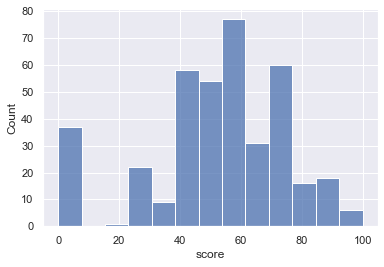

In [13]:
desc = describe_numcol(data.score)

Нули выбиватся из результатов оценок на экзамене.

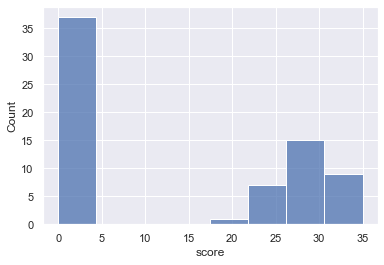

In [14]:
sns.histplot(data.loc[data.score < desc['25%'] ].score) ;

Очень похоже, что строки с оценкой 0 не релевантны. Это может быть свидетельство отсутствия экзамена, либо результат заполнения отсутствующих данных. Score - целевая переменная для будущего анализа. Удаляем строки с оценкой < 10, заодно будут удалены и пропущенные значния.

In [15]:
data = data.loc[data.score > 10]
# Вместе с нулями уходят и пропуски!
data_size = data.shape[0] ; print('В наборе осталось',data_size,'строк')

В наборе осталось 352 строк


# Анализ и обработка числовых признаков

Для удобства сделано табличное представление описания числовых признаков. 

In [16]:
num_list = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
            'granular_studytime', 'famrel', 'freetime', 'goout', 'health', 'absences']
num_cols_cols = ['NaNs', 'Share', 'Low_Allert',
                 'High_Allert', 'Min', 'Q1', 'Q2', 'Q3', 'Max']
num_columns = pd.DataFrame.from_dict(numerical_review(
    data, num_list), orient='index', columns=num_cols_cols)
num_columns

,NaNs,Share,Low_Allert,High_Allert,Min,Q1,Q2,Q3,Max
age,0,0.000000,,!,15.0,16.0,17.0,18.0,22.0
Medu,2,0.568182,,,0.0,2.0,3.0,4.0,4.0
Fedu,21,5.965909,!,!,0.0,2.0,3.0,3.0,40.0
traveltime,23,6.534091,,!,1.0,1.0,1.0,2.0,4.0
studytime,7,1.988636,,!,1.0,1.0,2.0,2.0,4.0
failures,20,5.681818,,!,0.0,0.0,0.0,0.0,3.0
granular_studytime,7,1.988636,!,,-12.0,-6.0,-6.0,-3.0,-3.0
famrel,24,6.818182,!,,-1.0,4.0,4.0,5.0,5.0
freetime,8,2.272727,!,,1.0,3.0,3.0,4.0,5.0
goout,6,1.704545,,,1.0,2.0,3.0,4.0,5.0


Почти все столбцы имеют пропуски значений. Количество пропусков в каждом столбце небольшое (меньше 10%), потому просто заполняю все пропуски медианой. Еще раз делаю обзор значений для работы с выбросами.

In [17]:
fill_all_nans(data, num_list)
num_columns = pd.DataFrame.from_dict(numerical_review(
    data, num_list), orient='index', columns=num_cols_cols)
num_columns

,NaNs,Share,Low_Allert,High_Allert,Min,Q1,Q2,Q3,Max
age,0,0.0,,!,15.0,16.0,17.0,18.00,22.0
Medu,0,0.0,,,0.0,2.0,3.0,4.00,4.0
Fedu,0,0.0,!,!,0.0,2.0,3.0,3.00,40.0
traveltime,0,0.0,,!,1.0,1.0,1.0,2.00,4.0
studytime,0,0.0,,!,1.0,1.0,2.0,2.00,4.0
failures,0,0.0,,!,0.0,0.0,0.0,0.00,3.0
granular_studytime,0,0.0,!,,-12.0,-6.0,-6.0,-3.00,-3.0
famrel,0,0.0,!,!,-1.0,4.0,4.0,4.25,5.0
freetime,0,0.0,!,,1.0,3.0,3.0,4.00,5.0
goout,0,0.0,,,1.0,2.0,3.0,4.00,5.0


Выбросы снизу (ниже полутора межквартильных размахов) подозреваются в следующих столбцах:

In [18]:
num_columns.loc[num_columns['Low_Allert'] == '!', ['Min', 'Q1', 'Q2', 'Q3']]

,Min,Q1,Q2,Q3
Fedu,0.0,2.0,3.0,3.00
granular_studytime,-12.0,-6.0,-6.0,-3.00
famrel,-1.0,4.0,4.0,4.25
freetime,1.0,3.0,3.0,4.00


Критический анализ таблицы выбросов снизу:

- Fedu - значения лежат в допустимом диапазоне значений,
- **famrel** - значения выходят за допустимую нижнюю границу, нужен углубленный разбор,
- freetime - значения лежат в допустимом диапазоне значений,
- **granular_studytime** - описание пропущено и нужен углубленный разбор.

count    352.000000
mean       3.946023
std        0.889916
min       -1.000000
25%        4.000000
50%        4.000000
75%        4.250000
max        5.000000
Name: famrel, dtype: float64
В колонке 0 пропущенных значений


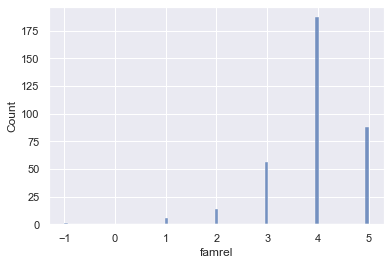

In [19]:
desc = describe_numcol(data.famrel)

В колонке **famrel** есть явные ошибки заполнения, которые заменяю на медиану.

In [20]:
data.loc[(data['famrel'] < 1), 'famrel'] = desc['50%']

count    352.000000
mean      -6.136364
std        2.497551
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: granular_studytime, dtype: float64
В колонке 0 пропущенных значений


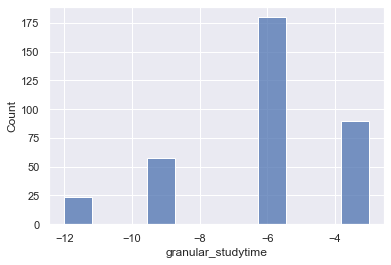

In [21]:
desc = describe_numcol(data.granular_studytime)

Описание на колонку **granular_studytime** отсутствует, данные выглядят обычно. Никак выбросы не корректирую. У колонки всего 4 значения. Возможно это не количественная, а псевдокатегориальная переменная неизвестного смысла.

Выбросы *сверху* (выше полутора межквартильных размахов) подозреваются в следующих столбцах:

In [22]:
num_columns.loc[num_columns['High_Allert'] == '!', ['Q1', 'Q2', 'Q3', 'Max']]

,Q1,Q2,Q3,Max
age,16.0,17.0,18.00,22.0
Fedu,2.0,3.0,3.00,40.0
traveltime,1.0,1.0,2.00,4.0
studytime,1.0,2.0,2.00,4.0
failures,0.0,0.0,0.00,3.0
famrel,4.0,4.0,4.25,5.0
absences,2.0,4.0,8.00,385.0


Критический анализ таблицы выбросов сверху:

- age - значения в пределах допустимого,
- **Fedu** - есть явная ошибка,
- traveltime - значения в пределах допустимого,
- studytime - значения в пределах допустимого,ч
- failures - значения в пределах допустимого,
- famrel - значения в пределах допустимого,
- **absences** - есть какой-то выброс,

Имеется значительный выброс **absences**. Проанализируем его структуру.

Всего 275 выбросов сверху из 352


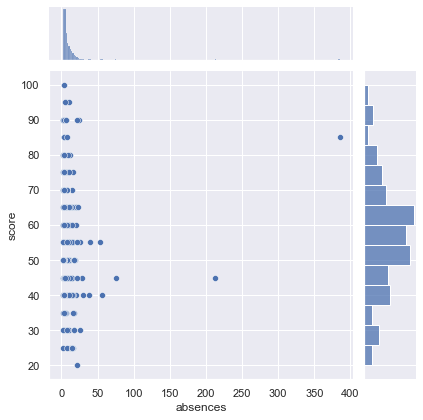

In [23]:
ho_limit = 2.5*desc['75%']-1.5*desc['25%']
print('Всего', data.loc[data.absences > ho_limit].shape[0],
      'выбросов сверху из', data_size)
sns.jointplot(x='absences', y='score', data=data.loc[data.absences > ho_limit])

Данных немного, но общий массив данных небольшой и удалять выбросы не целесообразно, поэтому просто заменим все значения свыше верхнего квартиля + три интерквартильных размаха на это значение.

In [24]:
ho = 4 * desc['75%'] - 3 * desc['25%']
data.loc[(data['absences'] > ho), 'absences'] = ho

В колонке **Fedu** есть выбросы значений.  Возможно это ошибка ввода - вбили лишний 0.

In [25]:
data.Fedu[data.Fedu > 4]

11    40.0
Name: Fedu, dtype: float64

Предполагаю, что это ошибка ввода и превращаю в 4

In [26]:
# data.loc[(data['absences'] > ho),'absences'] = ho
data.loc[(data['Fedu'] > 4), 'Fedu'] = 4

### Анализ корреляции количественных признаков

<AxesSubplot:>

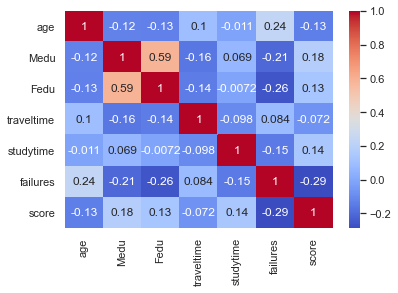

In [27]:
# age, Medu, Fedu, traveltime, studytime, failures, granular_studytime, famrel, freetime, goout, health, absences, score
sns.heatmap(data[['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
            'failures', 'score']].corr(), annot=True, cmap='coolwarm')

<AxesSubplot:>

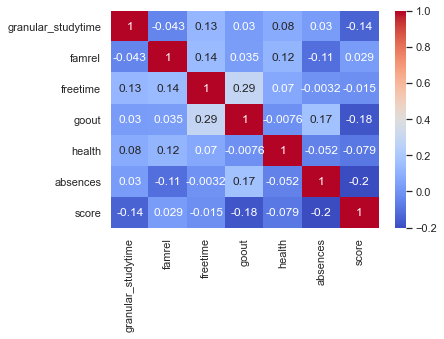

In [28]:
sns.heatmap(data[['granular_studytime', 'famrel', 'freetime', 'goout',
            'health', 'absences', 'score']].corr(), annot=True, cmap='coolwarm')

Похоже что две переменных (famrel) и (freetime) имеют слабую связь с конечным результатом.  Также ест внутренняя сильная корреляция между уровнем образования отца и матери.  В целом количественных колонок много и все они не очень скоррелированы с конечным результатом. 

Преобразую часть колонок с псевдо-количественными результатами в строковые категориальные
- Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

- Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

- traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

- studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

- famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

- freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

- goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

- health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)


In [29]:
add_cat_col(data, ['Medu', 'Fedu'], {
            0: 'no', 1: 'low', 2: 'mid', 3: 'high', 4: 'univ'})
add_cat_col(data, ['traveltime', 'studytime'], {
            1: 'min', 2: 'mod', 3: 'high', 4: 'very_high', })
add_cat_col(data, ['famrel', 'health'], {
            1: 'VB', 2: 'B', 3: 'A', 4: 'G', 5: 'VG'})
add_cat_col(data, ['freetime', 'goout'], {
            1: 'VL', 2: 'L', 3: 'A', 4: 'M', 5: 'VM'})
# data

Еще меня смущает колонка granular studytime, в которой содержатся значения, очень похожие на псевдокатегориальные. В описании данных пропуск в отношении этой переменной, но количество значений мало и напоминает псевдокатегории. Пробую ее тоже преобразовать в категориальную и обработать в рядц других категориальных.

In [30]:
add_cat_col(data, ['granular_studytime'],
            {-3: 'M3', -6: 'M6', -9: 'M9', -12: 'M12'})
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular_studytime,higher,internet,romantic,famrel,freetime,goout,health,absences,score,Medu_cat,Fedu_cat,traveltime_cat,studytime_cat,famrel_cat,health_cat,freetime_cat,goout_cat,granular_studytime_cat
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0,univ,univ,mod,mod,G,A,A,M,M6
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,low,low,min,mod,VG,A,A,A,M6
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,6.0,50.0,low,low,min,mod,G,A,A,L,M6
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,univ,mid,min,high,A,VG,L,L,M9
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0,high,high,min,mod,G,VG,A,L,M6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,6.0,45.0,mid,mid,min,mod,VG,G,VM,M,M6
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0,high,low,mod,min,B,B,M,VM,M3
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0,low,low,min,min,VG,A,VM,A,M3
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0,high,mid,high,min,G,VG,M,VL,M3


Избавляюсь от ненужных псевдокатегориальных колонок с числовыми значениями.

In [31]:
data.drop(['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel',
          'health', 'freetime', 'goout','granular_studytime' ], inplace=True, axis=1)
data

,school,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,absences,score,Medu_cat,Fedu_cat,traveltime_cat,studytime_cat,famrel_cat,health_cat,freetime_cat,goout_cat,granular_studytime_cat
0,GP,F,18,U,NaN,A,at_home,teacher,course,mother,0.0,yes,no,no,no,yes,yes,NaN,no,6.0,30.0,univ,univ,mod,mod,G,A,A,M,M6
1,GP,F,17,U,GT3,NaN,at_home,other,course,father,0.0,no,yes,no,no,no,yes,yes,no,4.0,30.0,low,low,min,mod,VG,A,A,A,M6
2,GP,F,15,U,LE3,T,at_home,other,other,mother,3.0,yes,no,NaN,no,yes,yes,yes,NaN,6.0,50.0,low,low,min,mod,G,A,A,L,M6
3,GP,F,15,U,GT3,T,health,NaN,home,mother,0.0,no,yes,yes,yes,yes,yes,yes,yes,2.0,75.0,univ,mid,min,high,A,VG,L,L,M9
4,GP,F,16,U,GT3,T,other,other,home,father,0.0,no,yes,yes,no,yes,yes,no,no,4.0,50.0,high,high,min,mod,G,VG,A,L,M6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,services,services,course,NaN,2.0,no,yes,yes,no,yes,yes,no,no,6.0,45.0,mid,mid,min,mod,VG,G,VM,M,M6
391,MS,M,17,U,LE3,T,services,services,course,mother,0.0,no,no,no,no,no,yes,yes,no,3.0,80.0,high,low,mod,min,B,B,M,VM,M3
392,MS,M,21,R,GT3,T,other,other,course,NaN,3.0,NaN,no,no,no,no,NaN,no,no,3.0,35.0,low,low,min,min,VG,A,VM,A,M3
393,MS,M,18,R,LE3,T,services,other,course,mother,0.0,no,no,no,NaN,no,yes,yes,no,0.0,50.0,high,mid,high,min,G,VG,M,VL,M3


In [32]:
new_cat_cols = ['Medu_cat','Fedu_cat', 'traveltime_cat','studytime_cat', 'famrel_cat', 'health_cat', 'freetime_cat', 'goout_cat', 'granular_studytime_cat']

Еще раз посмотрим на корреляцию количественных признаков:



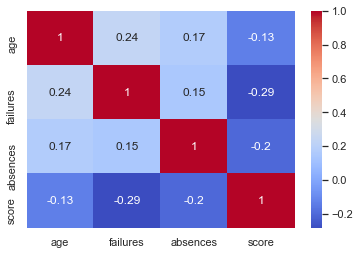

In [33]:
new_num_cols = ['age', 'failures', 'absences', 'score']
sns.heatmap(data[new_num_cols].corr(), annot = True, cmap = 'coolwarm');

## Анализ категориальных признаков

Предварительная обработка осуществялется только для "старых" категориальных признаков, изначально присутствовавших в наборе данных.  Преобразованные категориальные признаки уже очищены и будут проверены на статистическую значимость вместе со старыми.

In [37]:
cat_list = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
cat_cols_names = ['NaNs', 'Share', 'Moda', 'All_values']
cat_columns = pd.DataFrame.from_dict(cat_review(
    data, cat_list), orient='index', columns=cat_cols_names)
cat_columns

,NaNs,Share,Moda,All_values
school,0,0.000000,GP,"GP, MS"
sex,0,0.000000,F,"F, M"
address,14,3.977273,U,"U, R"
famsize,24,6.818182,GT3,"GT3, LE3"
Pstatus,41,11.647727,T,"T, A"
Mjob,17,4.829545,other,"other, services, teacher, at_home, health"
Fjob,32,9.090909,other,"other, services, teacher, health, at_home"
reason,15,4.261364,course,"course, reputation, home, other"
guardian,29,8.238636,mother,"mother, father, other"
schoolsup,9,2.556818,no,"no, yes"


In [38]:
cat_columns.loc[cat_columns.Share > 10.0]

,NaNs,Share,Moda,All_values
Pstatus,41,11.647727,T,"T, A"
famsup,36,10.227273,yes,"yes, no"
paid,36,10.227273,no,"no, yes"


По нескольким столбцам доля пропущенных значений чуть больше 10%, однако незначительно.  Все пропуски заполняю  самым частым значением в столбце.

In [39]:
fill_all_cat_nans(data, cat_list)
cat_columns = pd.DataFrame.from_dict(cat_review(
    data, cat_list), orient='index', columns=cat_cols_names)
cat_columns

,NaNs,Share,Moda,All_values
school,0,0.0,GP,"GP, MS"
sex,0,0.0,F,"F, M"
address,0,0.0,U,"U, R"
famsize,0,0.0,GT3,"GT3, LE3"
Pstatus,0,0.0,T,"T, A"
Mjob,0,0.0,other,"other, services, teacher, at_home, health"
Fjob,0,0.0,other,"other, services, teacher, health, at_home"
reason,0,0.0,course,"course, reputation, home, other"
guardian,0,0.0,mother,"mother, father, other"
schoolsup,0,0.0,no,"no, yes"


Обьединяю "старые" и "сконвертированные" категориальные признаки для выявления статистической значимости.  

In [40]:
all_cat_cols = cat_list + new_cat_cols
print('Всего', len(all_cat_cols), 'категориальных признаков')

Всего 26 категориальных признаков


Выявление столбцов категориальных признаков, со статистически значимыми различиями (теста Стьюдента, поправка Банферони).

In [41]:
val_cat_cols = [c for c in all_cat_cols if sel_stat_dif(data, c)]
print('В списке статистически значимых', len(val_cat_cols), 'колонок')

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки Medu_cat
Найдены статистически значимые различия для колонки Fedu_cat
Найдены статистически значимые различия для колонки studytime_cat
Найдены статистически значимые различия для колонки goout_cat
Найдены статистически значимые различия для колонки granular_studytime_cat
В списке статистически значимых 9 колонок


Формирую итоговый список столбцов для последующего моделирования. 

In [42]:
col_for_model = val_cat_cols + new_num_cols
col_for_model


['address',
 'Mjob',
 'Fjob',
 'schoolsup',
 'Medu_cat',
 'Fedu_cat',
 'studytime_cat',
 'goout_cat',
 'granular_studytime_cat',
 'age',
 'failures',
 'absences',
 'score']

In [43]:
data_for_model = data.loc[:, col_for_model]
data_for_model.head()

,address,Mjob,Fjob,schoolsup,Medu_cat,Fedu_cat,studytime_cat,goout_cat,granular_studytime_cat,age,failures,absences,score
0,U,at_home,teacher,yes,univ,univ,mod,M,M6,18,0.0,6.0,30.0
1,U,at_home,other,no,low,low,mod,A,M6,17,0.0,4.0,30.0
2,U,at_home,other,yes,low,low,mod,L,M6,15,3.0,6.0,50.0
3,U,health,other,no,univ,mid,high,L,M9,15,0.0,2.0,75.0
4,U,other,other,no,high,high,mod,L,M6,16,0.0,4.0,50.0


## Выводы

Итак, в результате EDA для анализа влияния параметров обучения на экзаменационную оценку по математике получены следующие выводы:

- В оценка на экзамене было небольшое количество пустых значений и соответсвующие строки были отброшены.
- В числовых данных было мало пустых значений, они все были заполнены медианой.
- В числовых данных было достаточно много столбцов с псевдокатегориальными данными, которые были заменены на категориальные.
- В числовых псевдокатегориальных данных были выбросы, связанные скорее всего с ошибками ввода. Они были скорректированы на возможное значение или медианное значение.
- Девять числовых псевдокатегориальных столбцов были сконвертированы в категориальные для полследующей проверки. Они имеют приставку _cat в конце наименования.
- В количественных данных есть столбец absences с небольшим количеством значительных выбросов значений. Такие выбросы были обрезаны по уровню верхнего квартиля плю три межквартильных размаха.
- Номинативных столбцов в наборе не найдено.
- В категориальных столбцах были пропуски значений в небольшом количестве (14 столбцов до 10% строк и 3 столбца до 12% строк). Все они были заполнены самым модой значений.
- Для построения модели можно использовать 12 параметров: 3 количественных и 9 категориальных.
- Учитывая невысокую корреляцию количественных переменных и конечного результат, возможно, имеет смысл начинать строить модель с категориальных признаков и добавлять количественные для улучшения точности модели. 